# REDES SEM FIOS - SIMULAÇÃO DE REDES AD HOC (AODV)
## Prof. Fernando Matos

* Cleanderson Lins
* Jordy Lima
* Andrea Brito

---

## Camadas
 * A camada física é abstraída nesse contexto, uma vez que seriam necessários procedimentos elétricos e/ou mecânicos para ativação da rede e transmissão de bits e como o que foi implementado é uma simulação, tudo o que ocorre durante o processo já está contido em uma camada física imaginária. A mesma é representada quando ocorre uma comunicação entre os hosts.  
 
 * Enlace do tipo sem fio, onde a comunicação ocorre de acordo com o alcance entre cada nós da rede. 
 
 * Rede baseada em _Mesh_.
  
---
## Entidades
* Router: armazena os hosts e lida com a tabela de roteamento de cada entidade.
* Package: contem dados de pacote, endereço do emissor e do receptor.
* Host: entidade principal da rede. Representa os nós de uma rede Ad Hoc.
* Manager: responsável por gerenciar as chamadas entre as controladoras e as views.


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

import sys
sys.path.insert(0, '../model')

# models
from router import Router
from host import Host
from package import Package

# utils
import utils
import views

# __init__ variables
WIDTH = 15
HEIGHT = 15

HOSTS_QUANTITY = 35
SIGNAL_RANGE = 5

class Manager:

    def __init__(self):
        self.width = WIDTH
        self.height = HEIGHT
        self.host_quantity = HOSTS_QUANTITY
        self.signal_range = SIGNAL_RANGE
        
        self.hosts = list()

        ## HOSTS INSTANTIATION ##
        # generates a random position and creates a host with it 
        print(f"\nGen {HOSTS_QUANTITY} hosts in {WIDTH}x{HEIGHT} Km...", end=" ")
        positions = utils.generate_coordinates(HOSTS_QUANTITY, WIDTH, HEIGHT)
        for position in positions:
            self.hosts.append(Host(position, SIGNAL_RANGE))
        print(f"{HOSTS_QUANTITY} hosts were created.")

        ## ROUTER INSTANTIATION ##
        print("Creating router...", end=" ")
        self.router = Router(self.hosts)
        print("Router created.")

        # gives an list of near active hosts for each host
        print("Running Hello for each host...", end=" ")
        self.router.hello()
        print("Host Hello status complete.\n")

        # now each host should discover a route to each other host
        # router.create_routes()


    def __repr__(self):
        '''
        Returns network information.
        '''
        pass


    def show_map(self):
        views.plot_map(self.hosts, WIDTH, HEIGHT)

    
    def reachable_hosts(self, host_id):
        views.plot_reachable_hosts(self.hosts[host_id], WIDTH, HEIGHT)


    def find_routes(self, id):
        for i in range(len(self.hosts)):
            if i != id:
                self.router.create_routes(id, i)
        
        self.show_routes(id)


    def show_routes(self, host_id):
        for k, v in self.hosts[host_id].routes.items():
            r, d = v
            print(f"H:{k} -> {r}: {d}")


    def show_route(self, host_id, host_dest):
        route, _ = self.hosts[host_id].routes[host_dest]
        views.plot_route(self.hosts, route, WIDTH, HEIGHT)


    def change_status(self, host_id):
        '''
        Sets an host to offline status.
        '''
        self.hosts[host_id].change_status()

        for host in self.hosts:
            host.routes = dict()

    
    def send_data(self, data, sender_id, receiver_id):
        '''
        Sends a package based on its sender and receiver.
        If there's no way to get to the receiver, throws an error.
        If gets a list of hosts back, plot the route.
        '''

        p = Package(data, sender_id, receiver_id)

        if receiver_id in self.hosts[sender_id].routes:
            route, distance = self.hosts[sender_id].routes[receiver_id]

            self.router.forward_data(route, p)

            views.plot_route(self.hosts, route, WIDTH, HEIGHT)

            print(end="")
        else:
            print(f"Theres no route for the host {receiver_id}.")


    def show_fw_log(self, host_id):
        print(self.router.hosts[host_id].forwarded_packages)


    def show_host_info(self, host_id):
        h = self.router.hosts[host_id]
        print(f"Host address: {h.address}")
        print(f"Sent packages: {h.sent_data}")
        print(f"Received packages: {h.received_data}")

## Organização da rede

  A rede é gerada aleatóriamente, utilizando bibliotecas do Python para gerar números randômicos para valores em X e Y que representam a posição dos hosts na rede, além de um scatter que representa o alcance de cada host em relação aos outros hosts da rede. A quantidade de nós na rede, bem como o tamanho dos eixos da rede (consequentemente seu alcance em "km") podem ser alterados modificando as variáveis `hosts_quantity`, `width` e `height`.

In [3]:
m = Manager()


Gen 35 hosts in 15x15 Km... 35 hosts were created.
Creating router... Router created.
Running Hello for each host... Host Hello status complete.



---
## Representação visual da rede

Para uma melhor representação da rede, optamos por usar a biblioteca `matplotlib`.
O Exemplo abaixo demonstra o cenário em que temos um campo de 225Km².

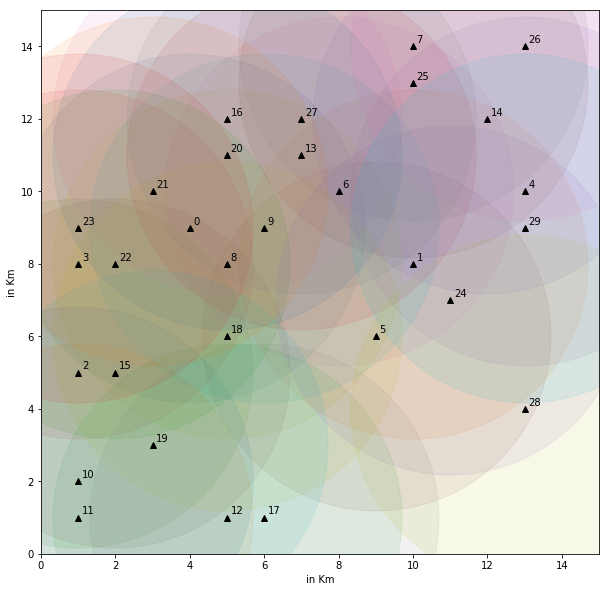

In [4]:
m.show_map()

## Roteamento

O algoritmo de roteamento implementado foi o AODV, onde envia um RREQ para um determinado host e recebe através da rede um RREP com os caminhos até o destino, onde os nós intermediários já aprendem as rotas intermediárias para destino final.

No exemplo abaixo, estamos dando um sinal de descoberta de rota para todos os nós alcançáveis da rede.

In [11]:
m.find_routes(26)

H:0 -> [26, 14, 4, 1, 5, 18, 0]: 19.113122279787035
H:1 -> [26, 14, 1]: 6.708203932499369
H:2 -> [26, 14, 4, 1, 5, 18, 2]: 20.073950245236315
H:3 -> [26, 14, 4, 1, 5, 18, 3]: 20.422980574618236
H:5 -> [26, 14, 4, 29, 24, 5]: 10.53663105724556
H:6 -> [26, 14, 6]: 6.708203932499369
H:8 -> [26, 14, 4, 1, 5, 8]: 16.422980574618236
H:9 -> [26, 14, 4, 1, 9]: 13.837882267736525
H:10 -> [26, 14, 4, 1, 5, 18, 2, 10]: 43.78872688735518
H:11 -> [26, 14, 4, 1, 5, 18, 2, 11]: 44.78872688735518
H:12 -> [26, 14, 4, 1, 5, 18, 19, 12]: 46.85322198960116
H:13 -> [26, 14, 4, 1, 13]: 13.957417329238151
H:15 -> [26, 14, 4, 1, 5, 18, 15]: 19.113122279787035
H:16 -> [26, 14, 4, 1, 5, 18, 8, 16]: 21.950844619618657
H:18 -> [26, 14, 4, 1, 5, 18]: 15.950844619618655
H:19 -> [26, 14, 4, 1, 5, 18, 19]: 19.556395895082645
H:20 -> [26, 14, 4, 1, 5, 18, 8, 20]: 20.950844619618657
H:21 -> [26, 14, 4, 1, 5, 18, 21]: 20.422980574618236
H:22 -> [26, 14, 4, 1, 5, 18, 22]: 19.556395895082645
H:23 -> [26, 14, 4, 1, 5, 18, 

---

Depois do descobrimento das rotas, podemos iniciar o envio de dados entre os nós.
A simulação do envio de dados via camada física foi implementada pela função `send_data`, onde a mesma recebe com parâmetro o dado a ser enviado, o nó de origem e nó de destino.

---

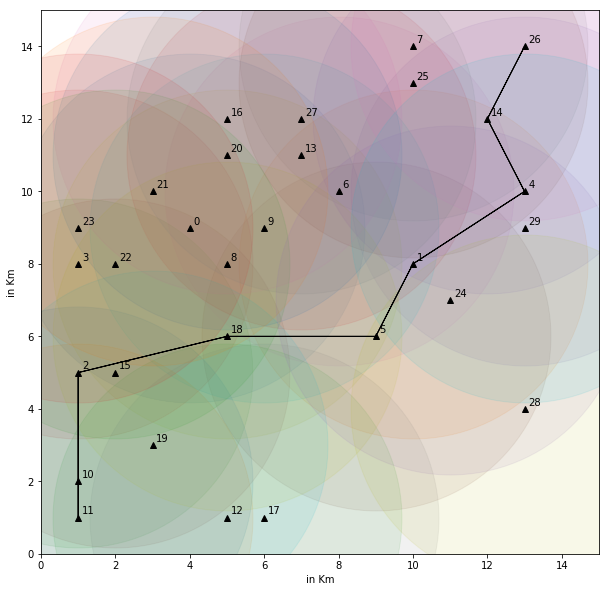

In [12]:
m.send_data("0000", 26, 11)

---
Afim de simular um defeito durante o encaminhamento da mensagem, podemos desligar um dos nós do caminho encontrado, como exemplo mudamos o status do nó 2 para `OFF`.

---

In [13]:
m.change_status(2)

---
Após isso, é preciso ser feito o descobrimento da rede novamente.

---

In [14]:
m.find_routes(26)

H:0 -> [26, 14, 4, 1, 5, 18, 0]: 19.113122279787035
H:1 -> [26, 14, 1]: 6.708203932499369
H:3 -> [26, 14, 4, 1, 5, 18, 3]: 20.422980574618236
H:5 -> [26, 14, 4, 29, 24, 5]: 10.53663105724556
H:6 -> [26, 14, 6]: 6.708203932499369
H:8 -> [26, 14, 4, 1, 5, 8]: 16.422980574618236
H:9 -> [26, 14, 4, 1, 9]: 13.837882267736525
H:10 -> [26, 14, 4, 1, 5, 18, 15, 10]: 44.07411017314122
H:11 -> [26, 14, 4, 1, 5, 18, 15, 11]: 45.034938138590505
H:12 -> [26, 14, 4, 1, 5, 18, 19, 12]: 45.97632761521883
H:13 -> [26, 14, 4, 1, 13]: 13.957417329238151
H:15 -> [26, 14, 4, 1, 5, 18, 15]: 19.113122279787035
H:16 -> [26, 14, 4, 1, 5, 18, 8, 16]: 21.950844619618657
H:18 -> [26, 14, 4, 1, 5, 18]: 15.950844619618655
H:19 -> [26, 14, 4, 1, 5, 18, 19]: 19.556395895082645
H:20 -> [26, 14, 4, 1, 5, 18, 8, 20]: 20.950844619618657
H:21 -> [26, 14, 4, 1, 5, 18, 21]: 20.422980574618236
H:22 -> [26, 14, 4, 1, 5, 18, 22]: 19.556395895082645
H:23 -> [26, 14, 4, 1, 5, 18, 8, 23]: 22.07395024523632
H:24 -> [26, 14, 4, 24]

---
E torna-se possível o envio da mensagem novamente, agora sem o uso do nó 2 que teve seu `status` mudado para `OFF`

---

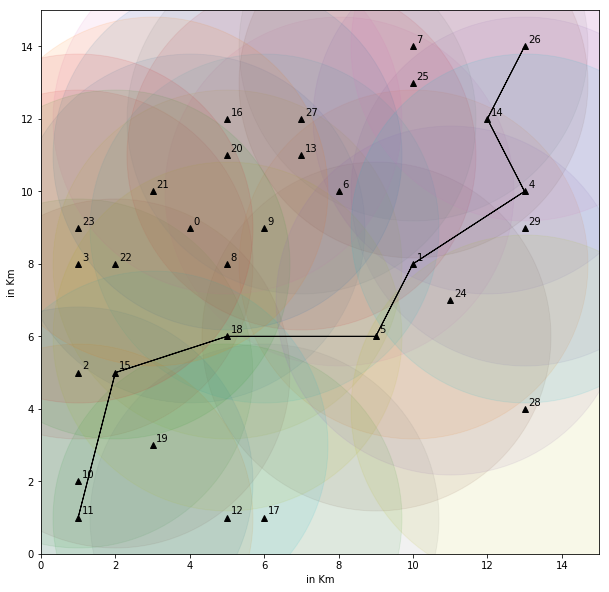

In [15]:
m.send_data("0000", 26, 11)

In [16]:
m.show_host_info(26)

Host address: 26
Sent packages: [ID:2
SENDER:26
RECEIVER:11, ID:3
SENDER:26
RECEIVER:11]
Received packages: []
